<a href="https://colab.research.google.com/github/soda1102/AI_26/blob/main/03_01_k%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 이번에는 여름에 농어철로 농어 주문이 크게 늘어서 MBC 마켓에서 업계 최초로 농어를 무게 단위로 판매하려고 한다.
# 무게 단위로 판매를 하면 가격 측정도 원활하고 고객도 합리적으로 판매할 수 있다.
# 그런데 공급처에서 생선 무게를 잘못 측정해서 보낼 수 있기에 농어의 무게를 재 측정해야 한다.
# 다른 데이터는 정상범위가 있으니 예측할 수 있을까?
# 이렇게 예측하는 것을 회귀라고 한다.
# 샘플 데이터가 필요하니 외부에서 56개의 샘플을 받아서 처리해보자.
# 지도학습은 크게로 2가지로 나누어진다.

# 분류 (2진분류) : from sklearn.neighbors import KNeighborsClassifier
# 회귀 (예측 : 확률(임의의 어떤 숫자로 예측))
#      : from sklearn.neighbors import KNeighborsRegressor
# 회귀 : 두 변수 사이에 상관관계를 분석하는 방법

In [ ]:
# 리눅스 명령어로 코랩의 가상머신에 나눔폰트를 설치하고 적용하는 명령어
# 차트에 한글처리 용
!sudo apt-get install -y fonts-nanum  # !sudo : 가상머신 명령어 처리(관리자권한)
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf  # 설치후에 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
# 농어의 샘플자료 56개
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]) # 농어의 길이 배열리스트
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]) # 농어의 무게 배열리스트

기초자료


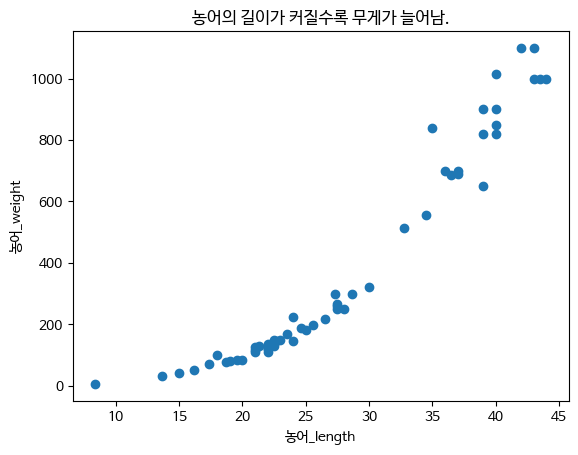

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')  # 한글처리

plt.scatter(perch_length, perch_weight)  # 농어의길이(x축), 농어의무게(y축)
plt.xlabel('농어_length')
plt.ylabel('농어_weight')
print('기초자료')
plt.title('농어의 길이가 커질수록 무게가 늘어남.')
plt.show()

# 산점도를 그리고나니 길이가 커짐에 따라 무게도 늘어난다.
# 이 데이터를 토대로 훈련(.fit)과 테스트(.score)를 진행해보자.
# 이 코드 실행 전 런타임 - 세션 다시 시작 - 리눅스 설치 이후부터 다시 실행(run)하면 한글 보임!

In [ ]:
# k-최근접 이웃 알고리즘에서의 회귀 KNeighborsRegressor

# 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다.
# 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측함
# k=3이라고 가정하면 2개의 대수가 있어 분류는 사각형으로 판단
# 회귀는 샘플에 가장 가까운 샘플 k개를 선택
# 타깃값 100, 80, 60을 더해 3으로 나눈 평균이 타깃값으로 사용된다.

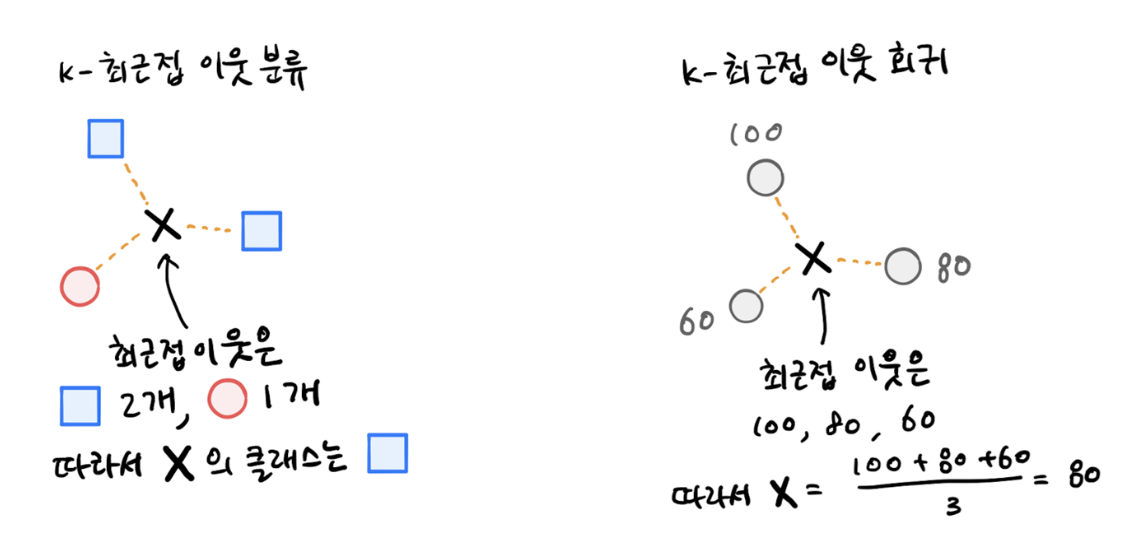

In [ ]:
# 사이킷런에서 제공하는 훈련세트, 테스트세트 생성

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# perch_length : input / perch_weight : target

# stratify 사용하지 않는다.(분류용) → 정답파일이 무게 확률이기 때문

# 사이킷 런의 train_test_split 함수를 사용해 훈련세트와 테스트세트로 나눈다.
# random_state=42 서로 같은 테스트를 위해 시드값 제공

# 사이킷 런에 사용할 훈련세트는 2차원 배열을 사용한다.
# perch_length가 1차원 배열이기 때문에 이를 나눈 train_input과 test_input도 1차원 배열이다.
# [3, ] → [3,1] 2차원 배열을 사용해야 하므로 억지로 변환 하는 reshape() 메서드를 활용한다. (4, ) → (2,2)

In [ ]:
test_array = np.array([1,2,3,4])
print(test_array.shape)
# 현재 1차원 배열로 나오는데, 이것을 억지로 2차원 배열 처리 해야한다.

(4,)


In [ ]:
# 2차원 배열로 변환
test_array = test_array.reshape(2,2)  # 억지로 2차원 배열 만드는 기법
print(test_array.shape)

# 전에는 2개의 특성으로 사용했었기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용했었지만
# 이번에는 특성이 1개라 수동으로 2차원 배열을 만들어야 한다. → numpy.reshape()를 활용
# (4,) → (2,2) 크기로 바꿔준다.

(2, 2)


In [ ]:
print(test_array)

[[1 2]
 [3 4]]


In [ ]:
# 입력데이터인 train_input과 test_input을 2차원 배열로 바꾸어야 한다.
# train_input (42,) → (42,1) → train_input.reshape(42,1)
# 넘파이는 배열의 크기를 자동으로 지정하는 기능도 제공 (-1) 값을 넣으면 된다.

train_input = train_input.reshape(-1, 1)
# -1 지정하면 원소 개수로 모두 채우라는 의미
# 1은 두번째 크기를 1로 변경

test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)
# -1을 사용하면 매번 원소의 크기를 외우지 않아도 된다.

(42, 1) (14, 1)


In [ ]:
# 전처리 끝
print(train_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [ ]:
# 훈련 시작

# 회귀 알고리즘용 구현 클래스(리그레스)
from sklearn.neighbors import KNeighborsRegressor

# from sklearn.neighbors import KNeighborsClassifier  분류용

# 회귀용 객체 생성
knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)  # 회귀용으로 훈련
# train_input : 농어의 길이 / train_target : 농어의 무게

KNeighborsRegressor()

In [ ]:
knr.score(test_input, test_target)
# test_input : 농어 테스트 길이 / test_target : 농어 테스트 무게
# 분류의 경우는 테스트세트에 있는 샘플을 정확하게 분류한 개수의 비율(정확도) → 예측값

# 회귀의 경우에는 평가를 경정 계수라고 한다. R^2
# R^2 = 1 = ((타깃 - 예측)^2의 합) / ((타깃 - 평균)^2의 합) 이다.
# 타깃의 평균 정도를 예측하는 수준 → R^2는 0에 가까워지고, 예측이 타깃에 가까워지면 1에 가까운 값
# 결과 : 99.2%로 예측이 가능한 수준

0.992809406101064

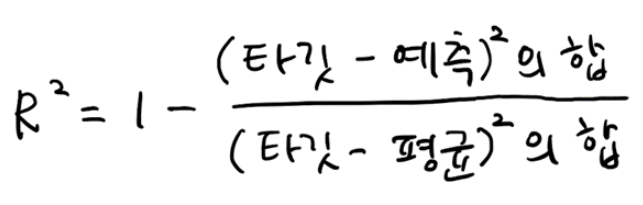

In [ ]:
knr.predict([[15]])
# 알고싶은 값 출력 15cm → 60g
# k-최근접한 5개의 이웃에 대한 값을 99.28% 확률로 나온 결과(60g)

array([60.])

In [ ]:
# sklearn.metrics 패키지 아래 여러가지 측정도구를 제공한다.
# mean_absolute_error 절대값 오차를 평균하여 반환

# 평균으로 절대값의 오차를 찾는 메서드
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측(prediction)을 만듭니다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)

# 19g 정도 타깃값과 다르다.(타깃과 예측한 값 사이의 차이)
print(mae)

19.157142857142862


In [ ]:
# 훈련한 모델을 사용해 훈련세트 점수 확인
print(knr.score(train_input, train_target))
# 훈련한 점수를 평가해보면 96.98%정도 나온다.

0.9698823289099254


In [ ]:
# 테스트 세트로 평가를 돌려보면 99.28%정도 나온다.
knr.score(test_input, test_target)

0.992809406101064

In [ ]:
# 위 결과를 보면 모델을 훈련세트에 훈련하면 잘 맞는 모델이 만들어진다.
# 이 모델을 훈련세트와 테스트세트에서 평가하면 두 값 중 어느것이 높을까?

# 보통 훈련세트의 점수가 조금 더 높게 나온다.
# 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘면 과대 적합이라고 한다.
# 과소적합 : 훈련세트보다 테스트세트 점수 높거나 두점수가 모두 낮은 경우

# 사이킷 런의 알고리즘 기본값을 3개로 조절해보자.

# 사이킷 런의 k-최근접 이웃 기본값이 5인데 이것을 3으로 변경
# 이웃의 갯수를 3으로 설정
knr.n_neighbors = 3

# 이 모델을 다시 훈련

# 3개의 이웃용 생성 훈련
knr.fit(train_input, train_target)

# 훈련점수 보기 98.04%
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
# 이웃 갯수 조정으로 과대, 과소 적합 해결 97.46%
print(knr.score(test_input, test_target))

0.9746459963987609


In [ ]:
# 알고싶은 값 출력 15cm → 47.333333g
knr.predict([[15]])
# 5개의 이웃을 참고하는 것보다 3개를 참고하는 것이 더 좋은 결과가 나온다.

array([47.33333333])

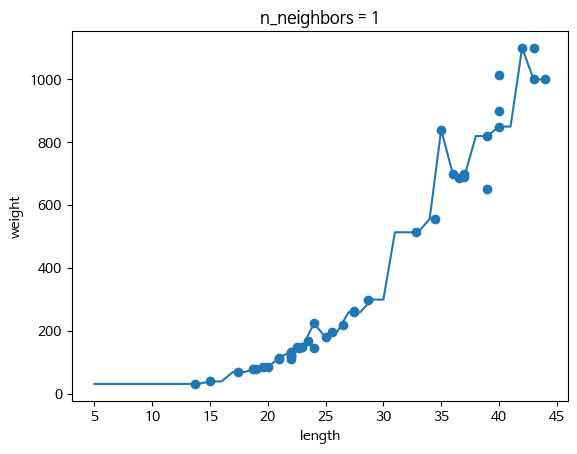

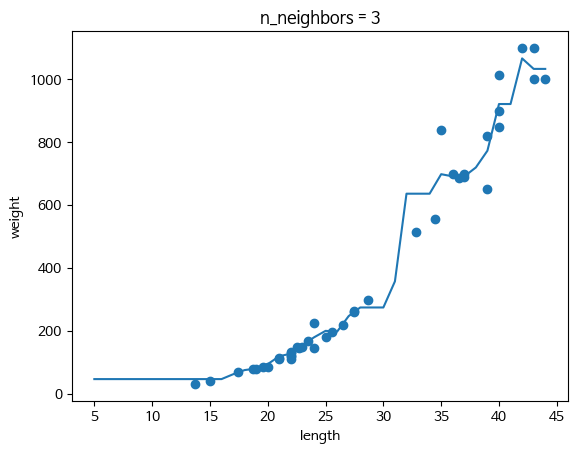

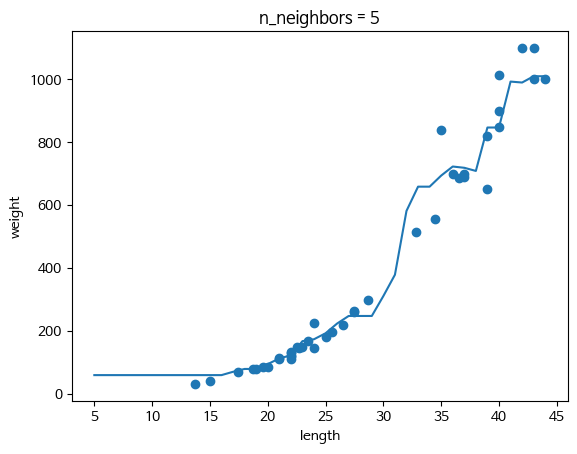

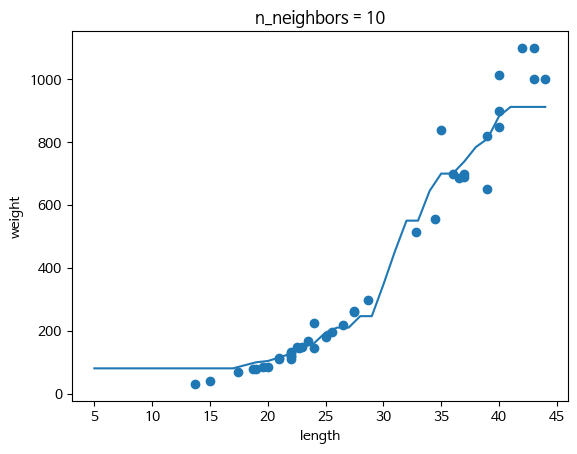

In [ ]:
# 앞으로 훈련할때 하이퍼파라미터(5 → 3 : 매개변수값) 변경으로 좋은 결과를 결정할 때 필수가 된다.
# 이것을 보고서에 남겨서 선택한 결과를 표출해야 한다.
# 그런데 이것을 사람이 값을 수동으로 바꿔가며 훈련을 하면 시간 낭비가 될 수 있으므로
# 파이썬의 for문 등을 많이 사용한다.
# 하이퍼파라미터 값은 대부분 홀수를 사용한다.(짝수인 경우에는 답이 잘 나오지 않는다.)

# k-최근접 이웃 회귀 객체를 만듭니다.
knr = KNeighborsRegressor()

# 5에서 45까지 X 좌표를 만듭니다.
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 3, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 3, 5, 10] :
  # 모델훈련
  knr.n_neighbors = n
  knr.fit(train_input, train_target)

  # 지정한 범위 x에 대한 예측 구하기
  prediction = knr.predict(x)

  # 훈련세트와 예측결과 그래프 그리기
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()